In [1]:
import numpy as np
import tofpipe
import matplotlib.pyplot as plt
import time
from scipy.ndimage import gaussian_filter
import queue
from skimage.measure import label

import numpy as np
import ctypes
import abc
from sys import platform
import conn_tcp

conn = conn_tcp.TCPSocket
model = conn(address="192.168.1.13", port=5000, conn_type='zmq')
model.open()

connecting to  192.168.1.13 5000
Client Connected


In [30]:
phase_img_clean, intensity_img_clean, phase_meta_clean, intensity_meta_clean = model.get_image()

In [42]:
phase_img, intensity_img, phase_meta, intensity_meta = model.get_image()

In [43]:
def preprocess_image(image):
    image = np.nan_to_num(image)
    image = np.clip(image, 0, 0.5)
    image = gaussian_filter(image, 1)
    return image

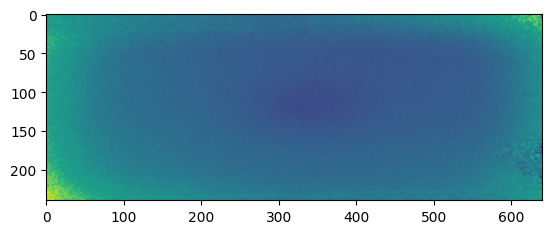

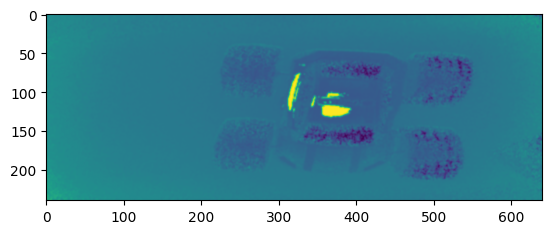

In [44]:
plt.imshow(preprocess_image(phase_img_clean))
plt.show()
plt.imshow(preprocess_image(phase_img))
plt.show()

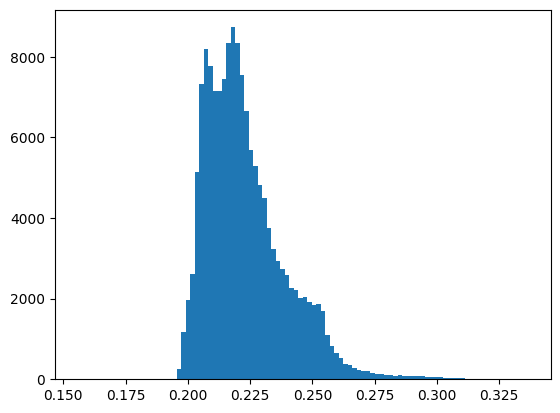

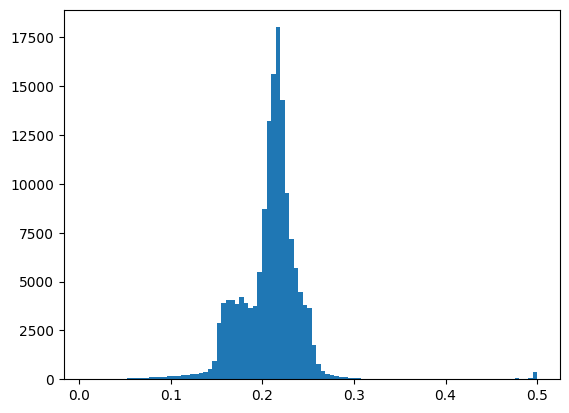

In [38]:
plt.hist(preprocess_image(phase_img_clean).flatten(), bins=100)
plt.show()
plt.hist(preprocess_image(phase_img).flatten(), bins=100)
plt.show()


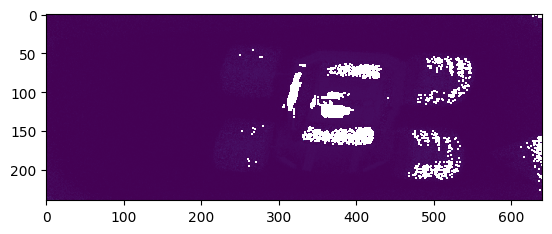

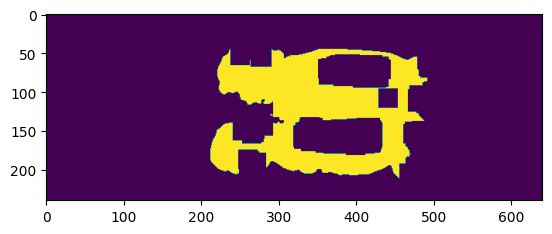

In [35]:
def getLargestCC(segmentation):
    labels = label(segmentation)
    assert( labels.max() != 0 ) # assume at least 1 CC
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+1
    return largestCC

car_cutoff = 0.01
phase_difference = np.abs(gaussian_filter(phase_img_clean - phase_img,3))
plt.imsave("phase_difference.png", phase_difference)
car_silhouette = phase_difference > car_cutoff
if np.sum(car_silhouette) > 0:
    car_silhouette = getLargestCC(car_silhouette)
    
plt.imshow(np.abs(phase_img_clean - phase_img))
plt.show()
plt.imshow(car_silhouette)
plt.show()